In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp 

from kafe2 import XYContainer, XYFit, Plot

In [2]:
# the measurement data
d = np.array([ 14. , 14.5 , 15. , 15.5 , 16. , 16.5, 17. , 17.5 , 18. , 18.5 , 19. , 19.5 , 20. , 21. , 22. ])            # Unsicherheit 0.5mm
phi_1 = np.array([ 54404 , 52606 , 47484 , 42623 , 39704 , 35297, 32744 , 29417 , 26662 , 24047 , 22056 , 19799 , 18431 , 14968 , 12256 ])      # Unsicherheit Sqrt[N], ohne Cd
phi_2 = np.array([ 51701 , 50161 , 45922 , 40788 , 38554 , 34387, 31687 , 28564 , 26295 , 24192 , 21385 , 19329 , 18196 , 14730 , 11559 ])       # mit Cd

# slicing the arrays
d_fast = d
d_therm = np.concatenate((d[0:8], d[10:]))

phi_fast = phi_1
phi_therm = np.concatenate((phi_1[0:8], phi_1[10:])) - np.concatenate((phi_2[0:8], phi_2[10:]))

# calculating the datapoints and the errors
x_fast = unp.uarray(d_fast, 0.05)
x_therm = unp.uarray(d_therm, 0.05)

y_fast = unp.log( unp.uarray(phi_fast, np.sqrt(phi_fast)) * d_fast**2 )
y_therm = unp.log( unp.uarray(phi_therm, np.sqrt(phi_therm)) * d_therm )

In [3]:
# defining the models
def Fast(r, R, c):
    return - r / R + c

def Therm(r, L, c):
    return - r / L + c

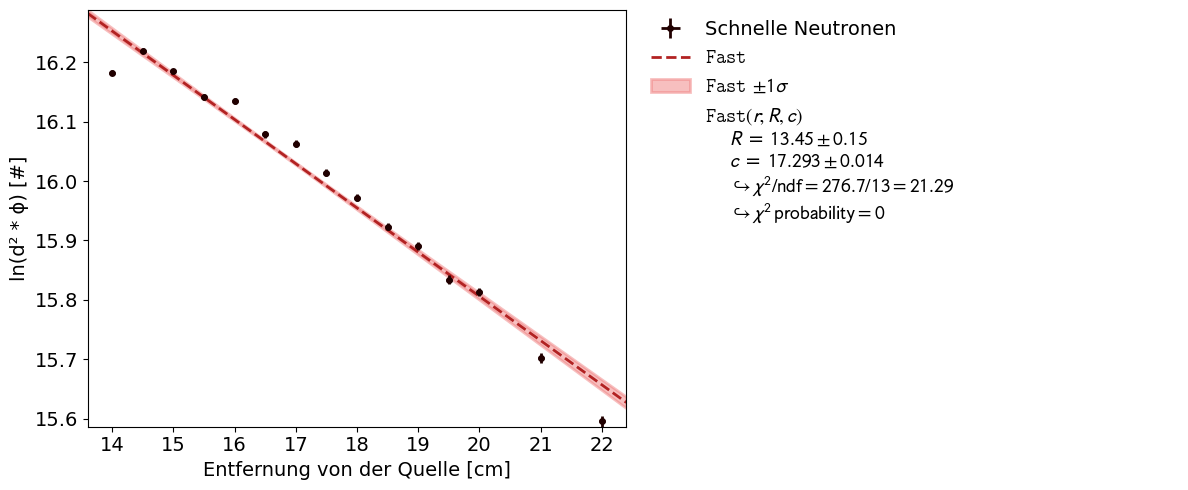

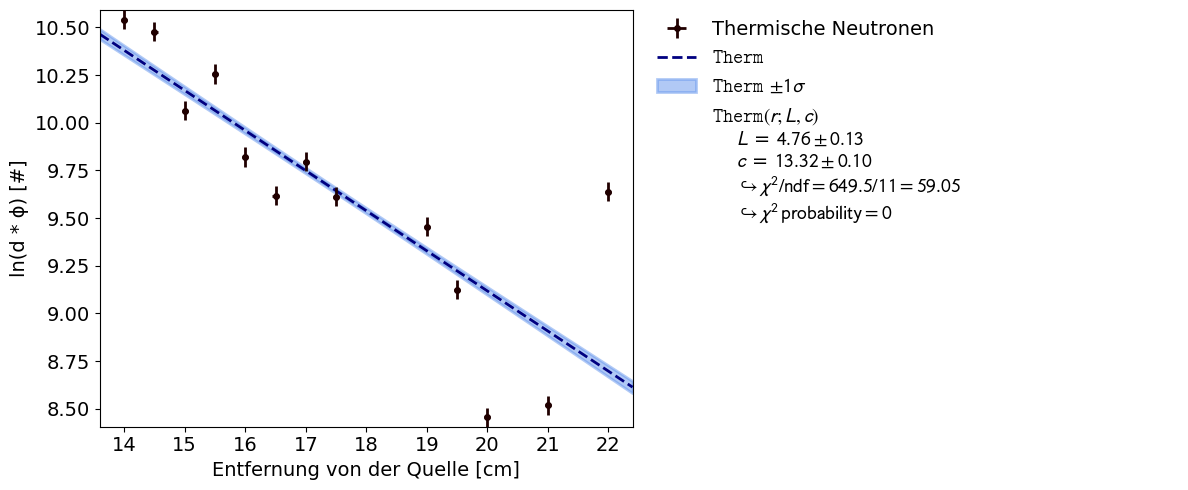

In [5]:
# making the containers
cont_fast = XYContainer(unp.nominal_values(x_fast), unp.nominal_values(y_fast))
cont_therm = XYContainer(unp.nominal_values(x_therm), unp.nominal_values(y_therm))

# assigning the labels
cont_fast.label = 'Schnelle Neutronen'
cont_fast.axis_labels = ('Entfernung von der Quelle [cm]', 'ln(d² * ϕ) [#]')

cont_therm.label = 'Thermische Neutronen'
cont_therm.axis_labels = ('Entfernung von der Quelle [cm]', 'ln(d * ϕ) [#]')


# initialising fit
fit_fast = XYFit(cont_fast, Fast)
fit_fast.add_error('x', unp.std_devs(x_fast))
fit_fast.add_error('y', unp.std_devs(y_fast))

fit_therm = XYFit(cont_therm, Therm)
fit_therm.add_error('x', unp.std_devs(x_therm))
fit_therm.add_error('y', unp.std_devs(x_therm))

# fitting
fit_fast.do_fit()
fit_therm.do_fit()

# making the fits nice

# plotting the fits
p1 = Plot(fit_fast)
p1.customize('model_line', 'color', [(0,'firebrick')])
p1.customize('model_error_band', 'color', [(0,'lightcoral')])
p1.plot()
# plt.savefig('fast_neutr.png')
plt.show()

p2 = Plot(fit_therm)
p2.customize('model_line', 'color', [(0,'navy')])
p2.customize('model_error_band', 'color', [(0,'cornflowerblue')])
p2.plot()
# plt.savefig('therm_neutr.png')
plt.show()